In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

In [5]:
from google.colab import files
uploaded = files.upload()

Saving marketing_AB.csv to marketing_AB (1).csv


In [6]:
# Load the dataset
df = pd.read_csv("marketing_AB.csv")



In [7]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  


In [8]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [9]:
# Basic summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
           Unnamed: 0       user id test group converted      total ads  \
count   588101.000000  5.881010e+05     588101    588101  588101.000000   
unique            NaN           NaN          2         2            NaN   
top               NaN           NaN         ad     False            NaN   
freq              NaN           NaN     564577    573258            NaN   
mean    294050.000000  1.310692e+06        NaN       NaN      24.820876   
std     169770.279667  2.022260e+05        NaN       NaN      43.715181   
min          0.000000  9.000000e+05        NaN       NaN       1.000000   
25%     147025.000000  1.143190e+06        NaN       NaN       4.000000   
50%     294050.000000  1.313725e+06        NaN       NaN      13.000000   
75%     441075.000000  1.484088e+06        NaN       NaN      27.000000   
max     588100.000000  1.654483e+06        NaN       NaN    2065.000000   

       most ads day  most ads hour  
count        588101  588101.000000  
uniq

In [13]:
# Check unique values in 'Test Group' and 'Converted'
print("\nUnique values in 'test group':", df['test group'].unique())
print("Unique values in 'converted':", df['converted'].unique())



Unique values in 'test group': ['ad' 'psa']
Unique values in 'converted': [False  True]


In [14]:
# Conversion rate by group
conversion_rates = df.groupby('test group')['converted'].mean()
print("\nConversion Rates:")
print(conversion_rates)


Conversion Rates:
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [15]:
# Count of users in each group
group_counts = df['test group'].value_counts()
print("\nUser count by group:")
print(group_counts)


User count by group:
test group
ad     564577
psa     23524
Name: count, dtype: int64


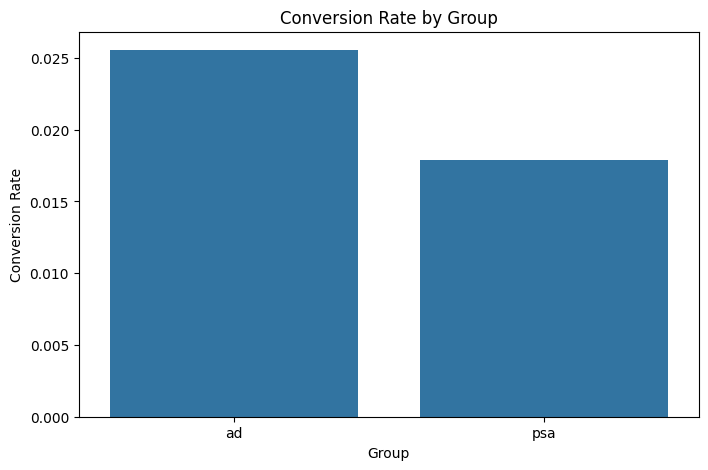

In [16]:
# Bar plot of conversion rate
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

In [17]:
# Create a contingency table
contingency = pd.crosstab(df['test group'], df['converted'])

In [18]:
# Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-Square Test:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Test:
Chi2 Statistic: 54.005823883685245
P-Value: 1.9989623063390075e-13


In [19]:
# Hypothesis testing result
if p < 0.05:
    print("Result: Statistically significant difference between groups (p < 0.05)")
else:
    print("Result: No statistically significant difference between groups (p ≥ 0.05)")


Result: Statistically significant difference between groups (p < 0.05)


In [21]:
# Estimate potential revenue
# Assume each conversion is worth $100 for example
conversion_value = 100
ad_group_conversions = df[(df['test group'] == 'ad') & (df['converted'] == True)]
potential_revenue = len(ad_group_conversions) * conversion_value
print(f"\nEstimated Potential Revenue from Ad Group: ${potential_revenue:,}")



Estimated Potential Revenue from Ad Group: $1,442,300


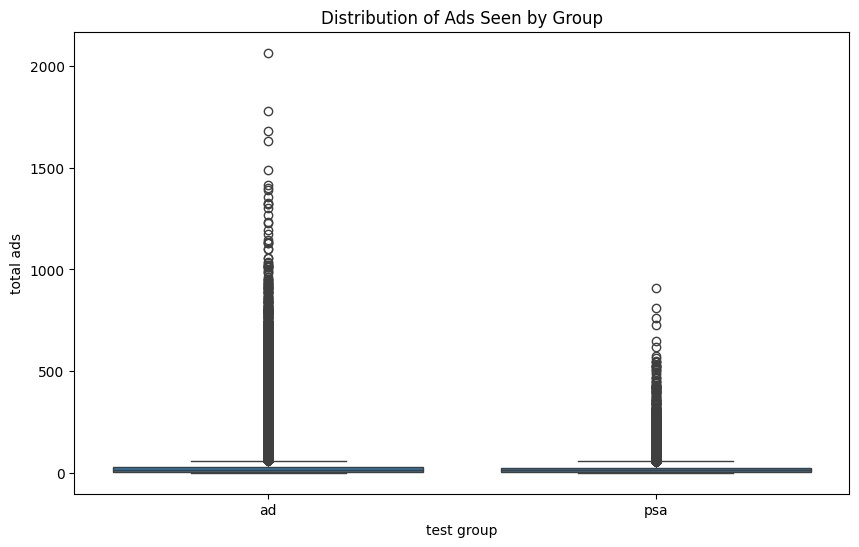

In [23]:
# Explore ad exposure
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='test group', y='total ads')
plt.title('Distribution of Ads Seen by Group')
plt.show()

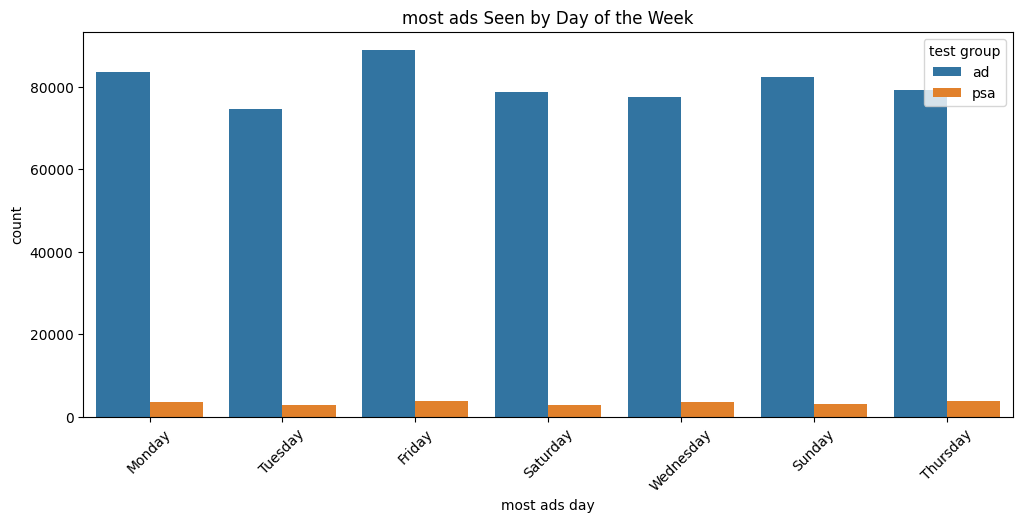

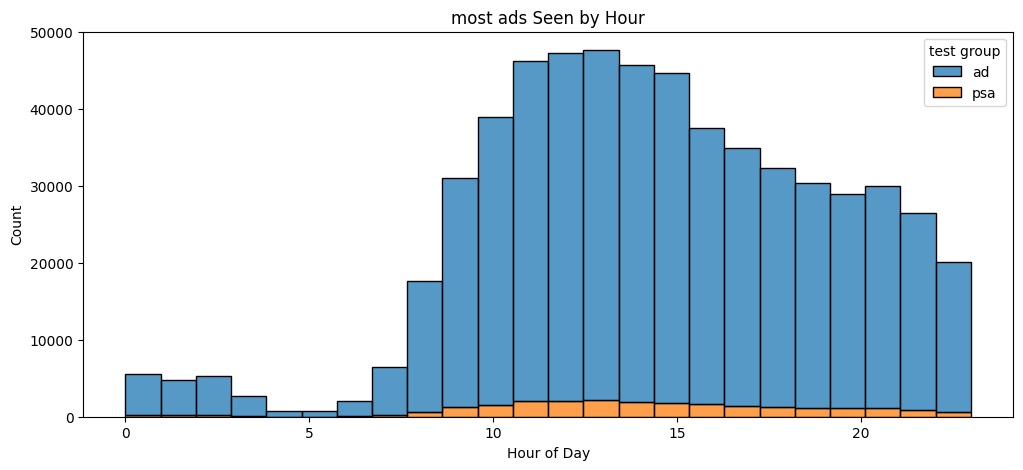

In [31]:
# Hour and Day analysis
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='most ads day', hue='test group') # Replace 'Most Ads Day' with the correct column name
plt.title('most ads Seen by Day of the Week')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
# Corrected the column name from 'most ads Hour' to 'most ads hour'
sns.histplot(data=df, x='most ads hour', hue='test group', multiple='stack', bins=24)
plt.title('most ads Seen by Hour')
plt.xlabel('Hour of Day')
plt.show()

In [ ]:
###  A higher conversion rate in the ad group suggests effectiveness of the campaign.

### A Chi-Square test with p-value < 0.05 confirms that the difference is statistically significant.

### Estimated revenue gives a tangible impact for business decisions.

### Visuals help communicate time-based ad performance insights.